### California Housing Dataset with Regression Techniques

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

### Import Dataset

In [1]:
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy
import numpy as np
import folium
import matplotlib.pyplot as plt 

housedf = datasets.fetch_california_housing(as_frame=True)
housedf.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Introduction to the dataset

In [2]:
housedf.data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [3]:
housedf.data.describe

<bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     

In [4]:
housedf.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
housedf.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No null values in the dataset. 

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

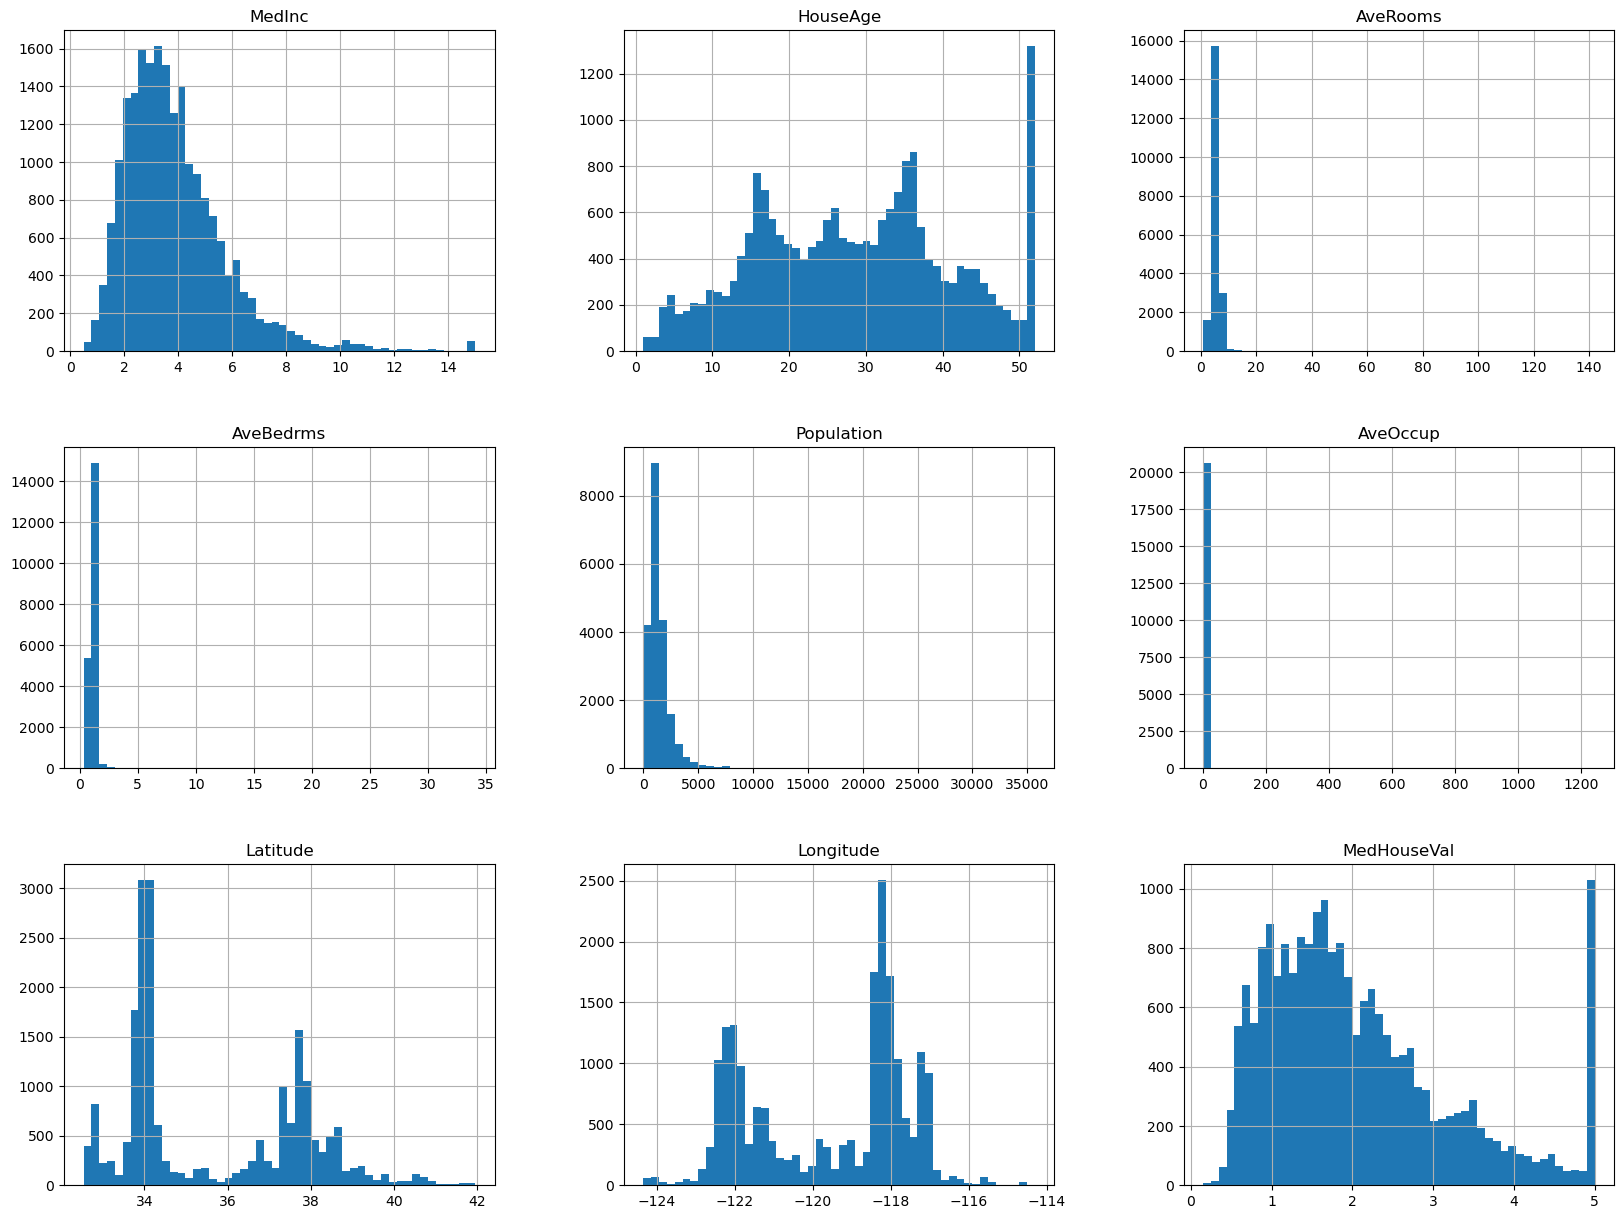

In [6]:
housedf.frame.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

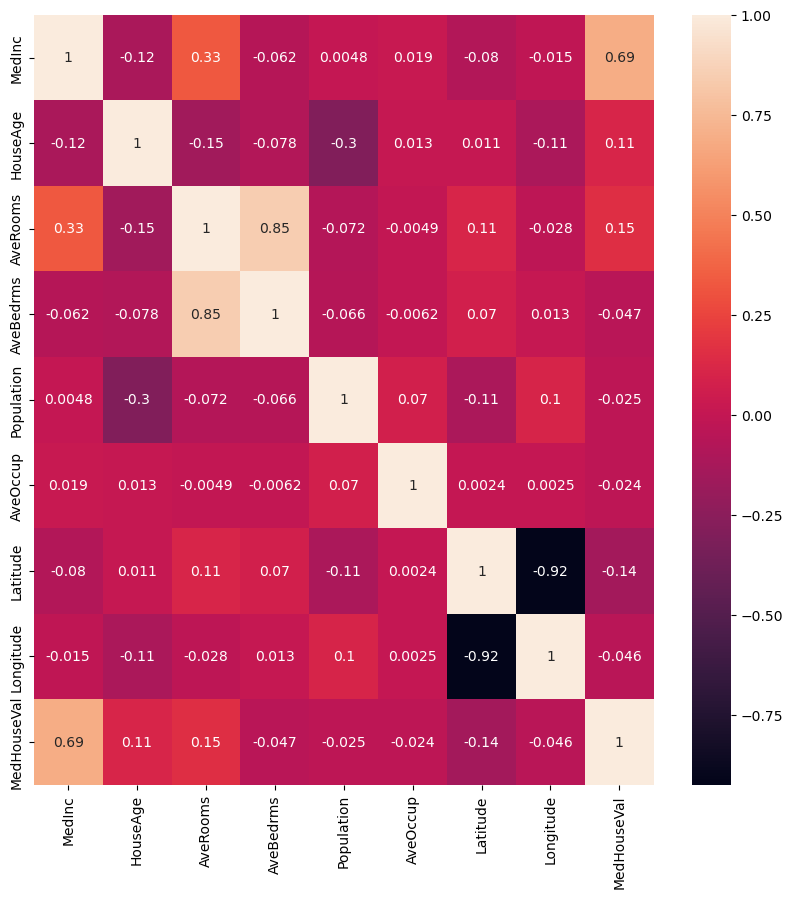

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(housedf.frame.corr(), annot=True)

In [8]:
corr_matrix = housedf.frame.corr()
# Check the how much each attribute correlates with the median house value
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

We notice a strong correlation between MedInc and the target MedHouseVal. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

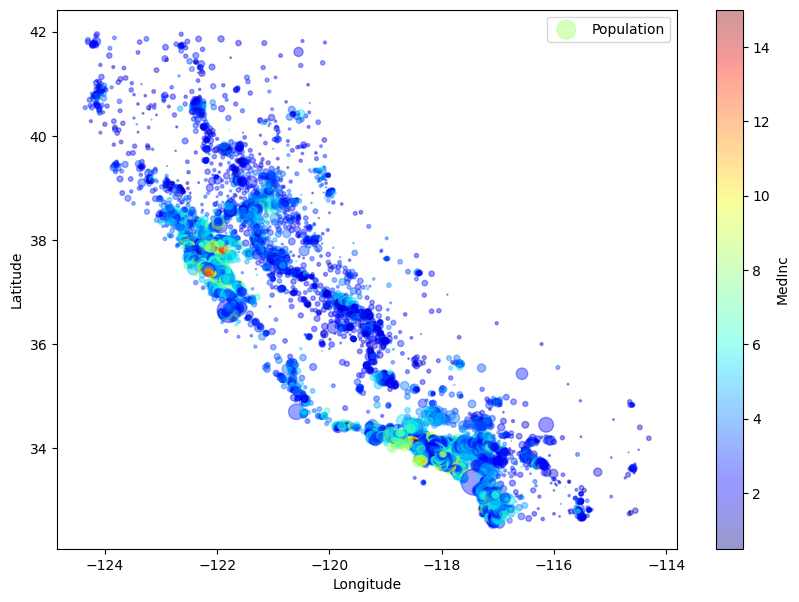

In [9]:
housedf.data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=housedf.frame["Population"]/100, label="Population", figsize=(10,7),
c="MedInc", cmap=plt.get_cmap("jet"), colorbar=True)

The population map indicates an outline of California.

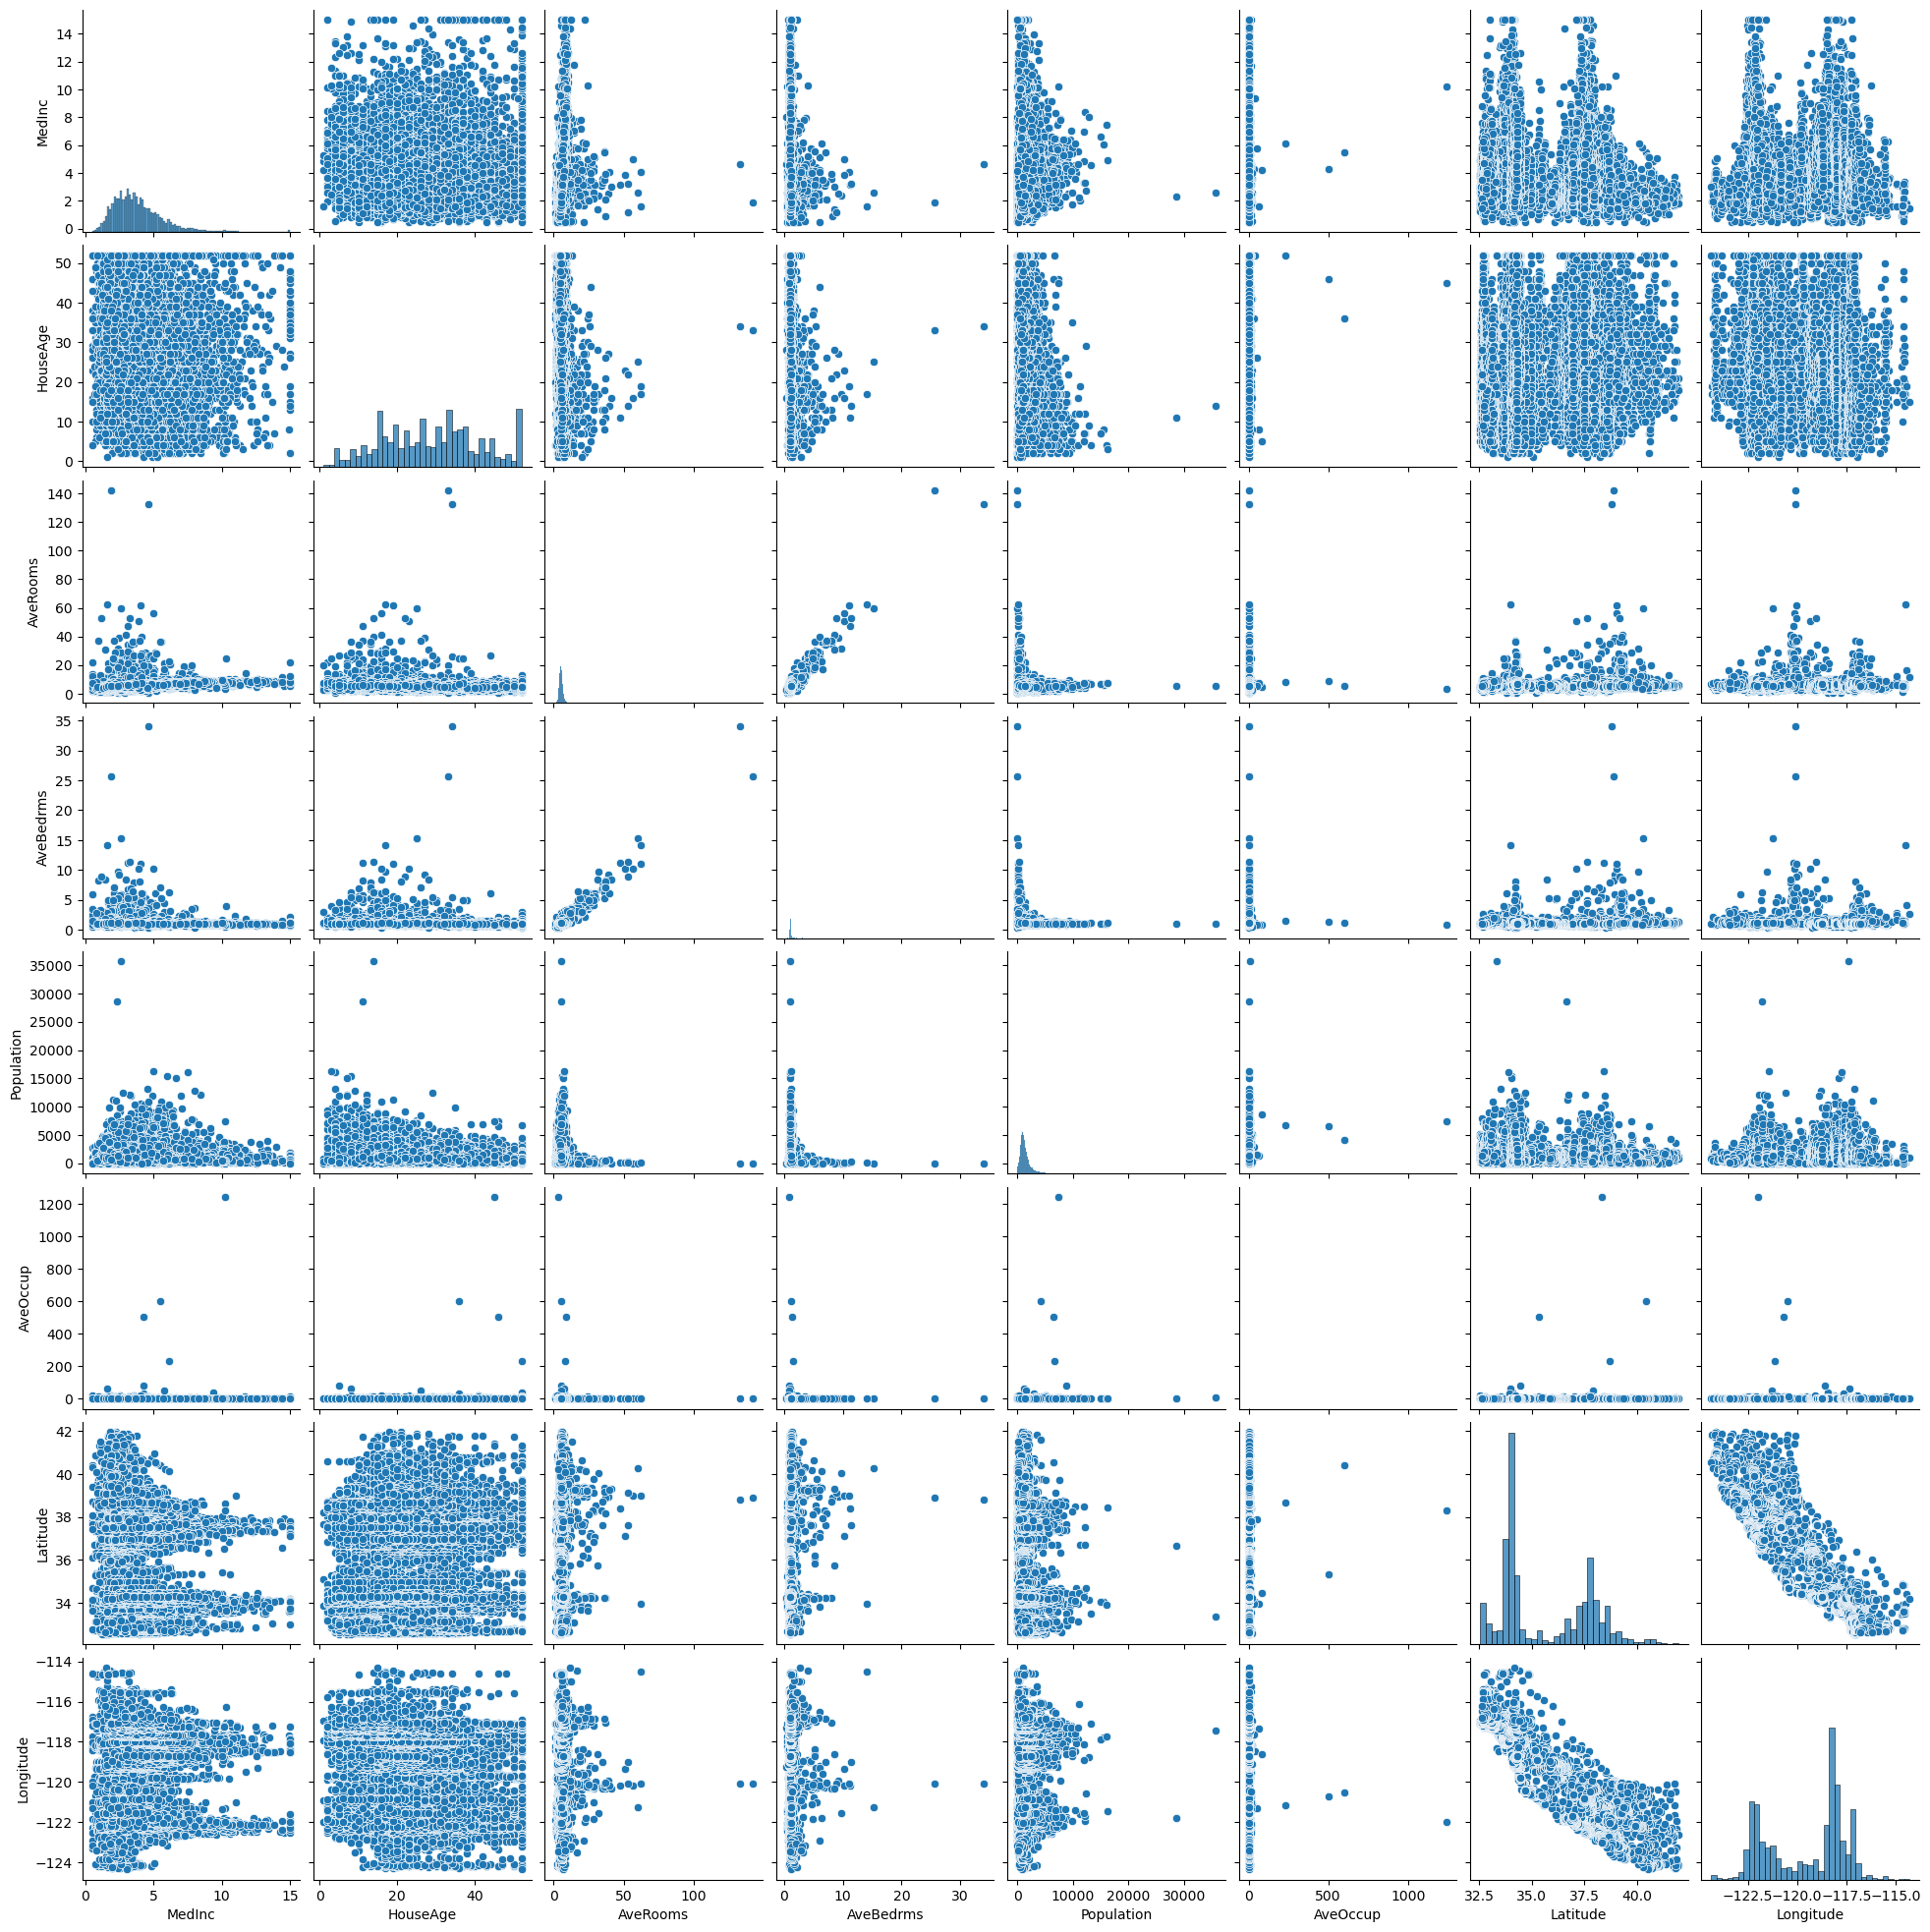

In [10]:
sns.pairplot(housedf.data)

Nothing is particularly noticable from running the pairplot. 

### Test for Normality via Q-QPlot

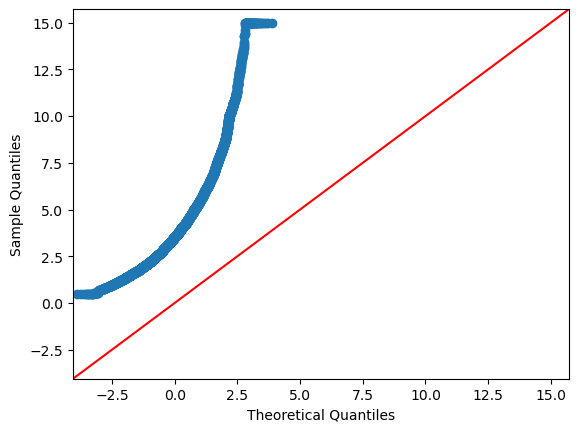

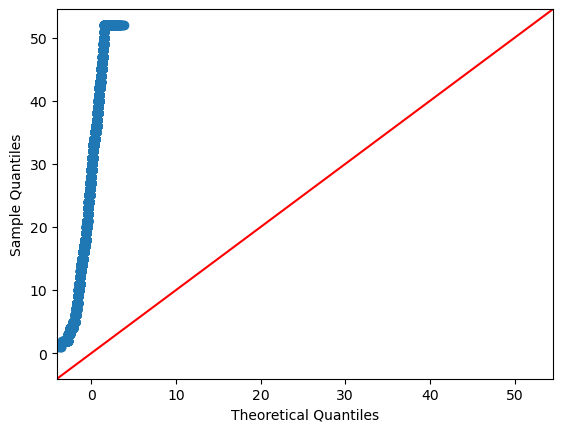

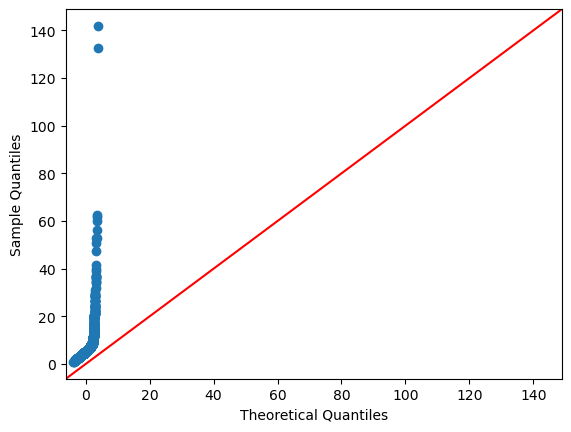

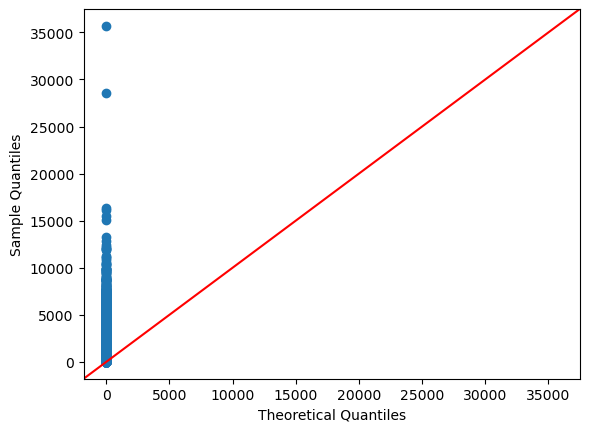

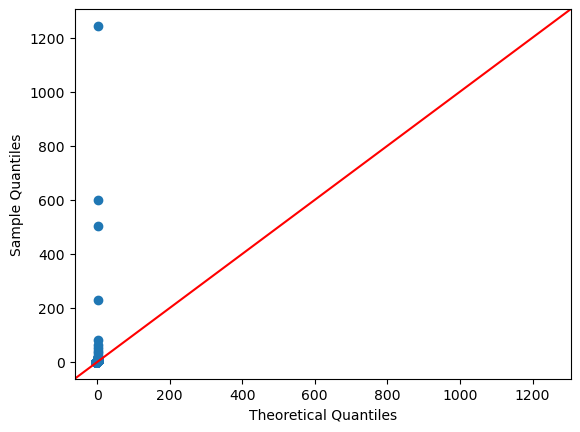

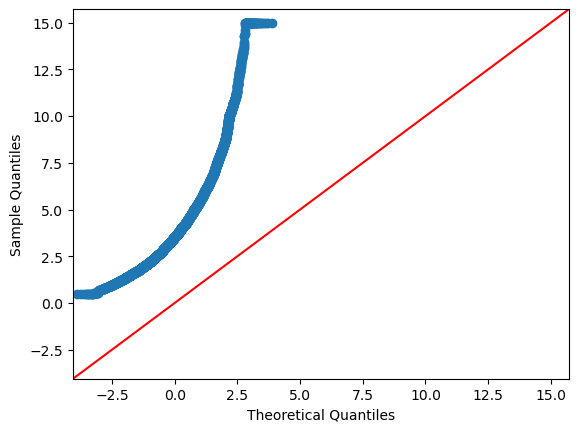

In [11]:
sm.qqplot(data=housedf.data['HouseAge'], line='45')
sm.qqplot(data=housedf.data['AveRooms'], line='45')
sm.qqplot(data=housedf.data['Population'], line='45')
sm.qqplot(data=housedf.data['AveOccup'], line='45')
sm.qqplot(data=housedf.data['MedInc'], line='45')

In [12]:
np.random.seed(1)
print(scipy.stats.shapiro(housedf.data['HouseAge'].sample(n=500)))
print(scipy.stats.shapiro(housedf.data['AveRooms'].sample(n=500)))
print(scipy.stats.shapiro(housedf.data['Population'].sample(n=500)))
print(scipy.stats.shapiro(housedf.data['AveOccup'].sample(n=500)))
print(scipy.stats.shapiro(housedf.data['MedInc'].sample(n=500)))

ShapiroResult(statistic=0.9814128875732422, pvalue=5.259565114101861e-06)
ShapiroResult(statistic=0.8836169242858887, pvalue=5.937743870246922e-19)
ShapiroResult(statistic=0.7313002347946167, pvalue=1.279472588143708e-27)
ShapiroResult(statistic=0.948268473148346, pvalue=3.2830912467807227e-12)
ShapiroResult(statistic=0.8840212225914001, pvalue=6.397907029949585e-19)


None of the columns are normally distributed. 

### Residuals vs Leverage

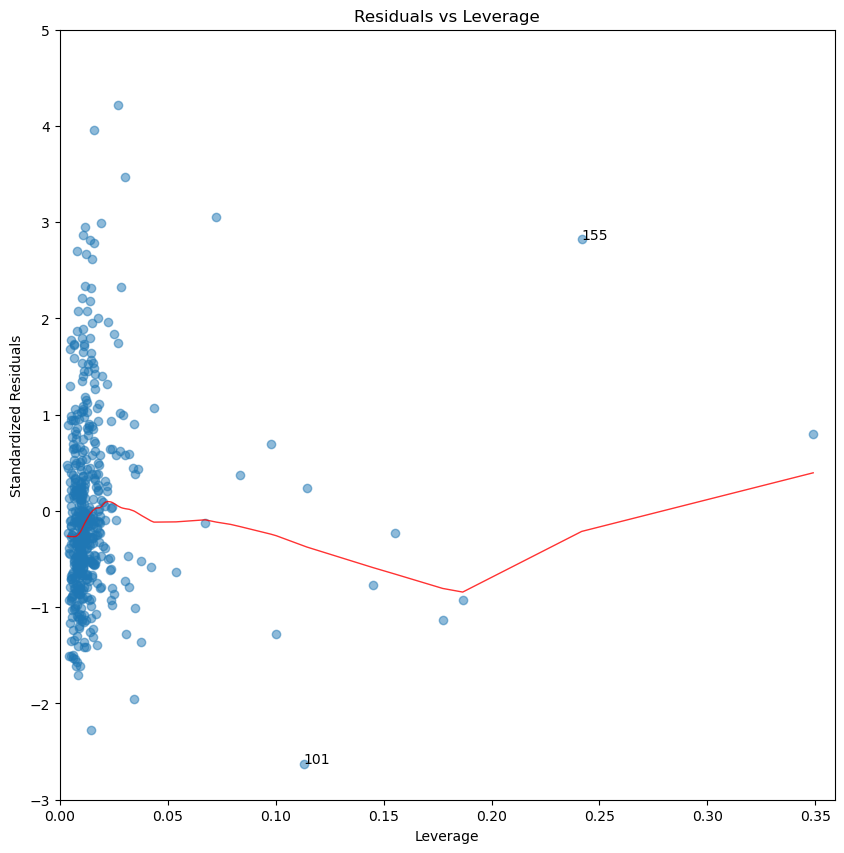

In [13]:
import warnings 
warnings.filterwarnings("ignore")
tmpdf = housedf.frame.sample(n=500)
X = tmpdf.iloc[:, 0:8]
y = tmpdf['MedHouseVal']
smmodel = sm.OLS(y, X)
model_fit = smmodel.fit()

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_4 = plt.figure(figsize=(10,10))
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
  plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))


### Homoscedasticity

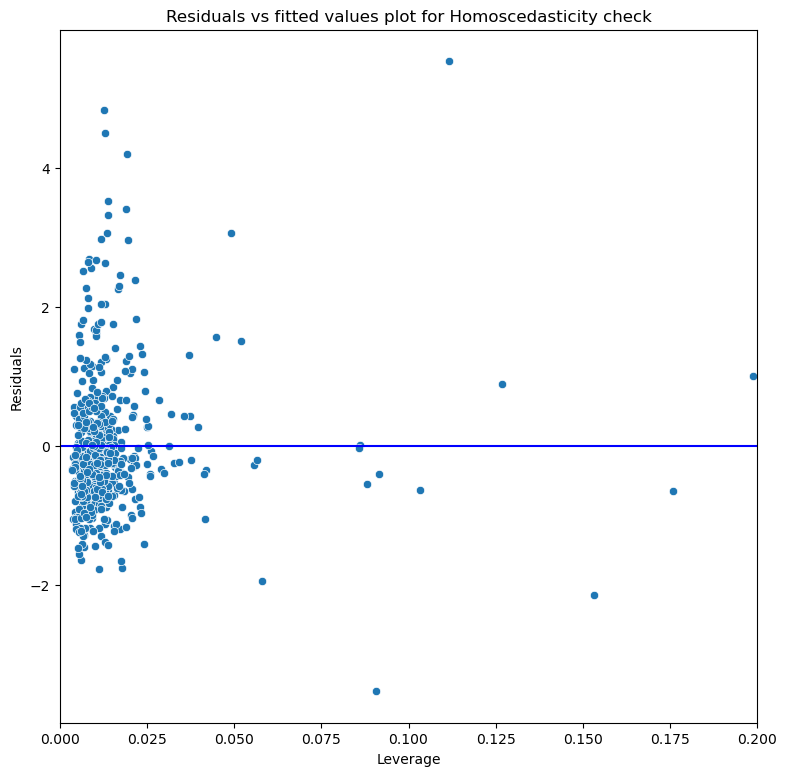

In [14]:
import warnings 
warnings.filterwarnings("ignore")
tmpdf = housedf.frame.sample(n=500)
X = tmpdf.iloc[:, 0:8]
y = tmpdf['MedHouseVal']
smmodel = sm.OLS(y, X)
model_fit = smmodel.fit()

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

fig4, ax4 = plt.subplots(figsize=(9,9))
ax4 = plt.gca()
g = sns.scatterplot(model_leverage, model_norm_residuals)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
# plt.ylim(-10,10)
plt.xlim(0,.2)
g = sns.lineplot([0,26],[0,0],color='blue')
g = plt.title('Residuals vs fitted values plot for Homoscedasticity check')


### OLS Regression

As a note linear regession assumes no multicollinearity.

In [15]:
tmpdf = housedf.frame.sample(n=500)
X = tmpdf.iloc[:, 0:8]
y = tmpdf['MedHouseVal']
smmodel = sm.OLS(y, X)
results = smmodel.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              647.7
Date:                Sat, 29 Oct 2022   Prob (F-statistic):                   1.15e-255
Time:                        16:29:21   Log-Likelihood:                         -523.36
No. Observations:                 500   AIC:                                      1063.
Df Residuals:                     492   BIC:                                      1096.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5802      0.028     21.059      0.000       0.526       0.634
HouseAge       0.0101      0.003      3.692      0.000       0.005       0.015
AveRooms      -0.2912      0.041     -7.056      0.000      -0.372      -0.210
AveBedrms      1.5645      0.229      6.836      0.000       1.115       2.014
Population -2.551e-05   2.93e-05     -0.870      0.385   -8.31e-05    3.21e-05
AveOccup      -0.0499      0.014     -3.649      0.000      -0.077      -0.023
Latitude      -0.0505      0.021     -2.435      0.015      -0.091      -0.010
Longitude     -0.0113      0.007     -1.669      0.096      -0.025       0.002
==============================================================================
Omnibus:                      102.693   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.186
Skew:                           1.069   Prob(JB):                     2.31e-51
Kurtosis:                       5.574   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
from sklearn.linear_model import LinearRegression

tmpdf = housedf.frame.sample(n=500)
X = tmpdf.iloc[:, 0:8]
y = tmpdf['MedHouseVal']
skmodel = LinearRegression().fit(X, y)
cdf = pd.DataFrame(skmodel.coef_, X.columns, columns=['Coefficients'])
print(cdf)

            Coefficients
MedInc          0.326027
HouseAge        0.010805
AveRooms        0.024038
AveBedrms      -0.047790
Population      0.000027
AveOccup       -0.340422
Latitude       -0.478811
Longitude      -0.466656


From the comparison of the two packages we still different results for the coefficients, but trending in a similar pattern. 
For example both packages had similar negative results for Latitude and Longitude. 

The results from the running the linear regression model indicate the mean of Population are significantly different from the other categories.

### Ridge Regression 

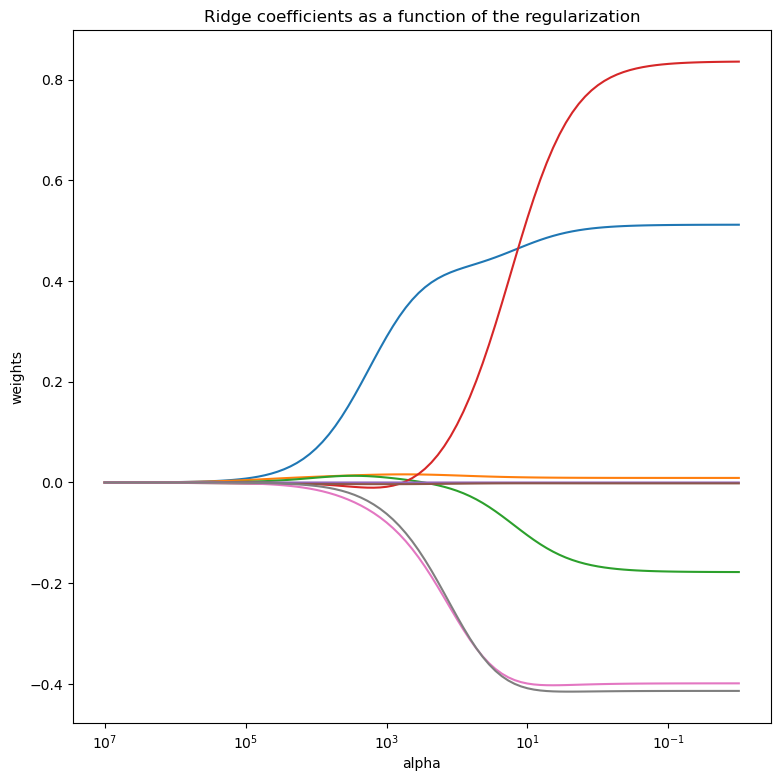

In [17]:
from sklearn.linear_model import Ridge

n_alphas = 100
alphas = np.logspace(-2, 7, n_alphas)
coefs = []

tmpdf = housedf.frame.sample(n=500)
X = tmpdf.iloc[:, 0:8]
y = tmpdf['MedHouseVal']

for a in alphas:
    ridge_model = Ridge(alpha=a, max_iter=1000, fit_intercept=True)
    ridge_result = ridge_model.fit(X,y)
    coefs.append(ridge_result.coef_)


# draw plot
fig, ax = plt.subplots(figsize=(9,9))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

The data analysis revealed that the data would cause issues for the regression model such as non-linearity, skewness, a large variation in range of values, and strong multicollinearity of features. 

Shaggy and Scooby-Doo should take into account the highest predictor being the average household income when searching for properties in California. 

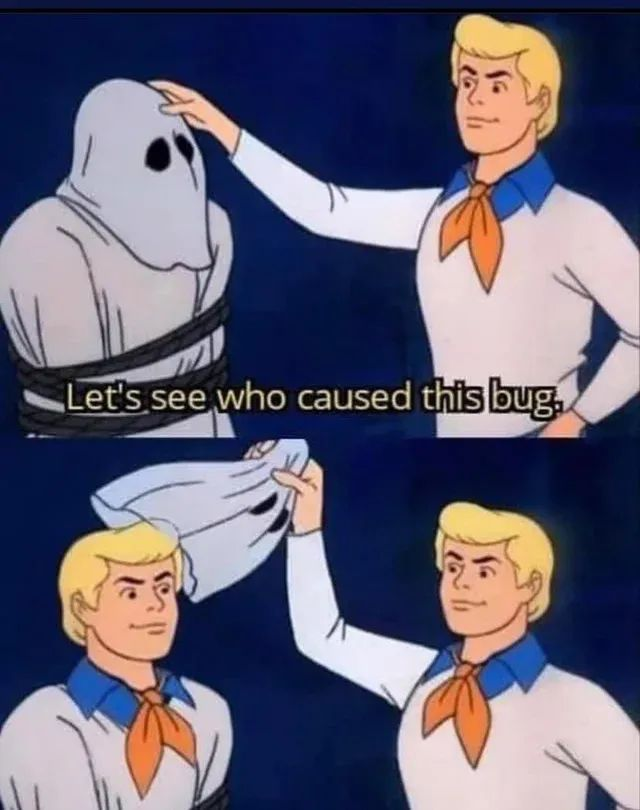